In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams, cm
import pymcfost as mcfost
import os
from astropy.io import fits
import aplpy

In [3]:
path_1 = '/home/jhyl3/Documents/mcfost_testing/default_no_settling'
path_2 = '/home/jhyl3/Documents/mcfost_testing/default_settling'

model_1 = mcfost.SED(path_1+"/data_th/")
image_1um_1 = mcfost.Image(path_1+"/data_1.0/")

model_2 = mcfost.SED(path_2+"/data_th/")
image_1um_2 = mcfost.Image(path_2+"/data_1.0/")

In [35]:
sed_1 = fits.open('default_no_settling/data_th/sed_rt.fits.gz')
sed_2 = fits.open('default_settling/data_th/sed_rt.fits.gz')
sed_1[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    4 / number of data axes                            
NAXIS1  =                   50 / length of data axis 1                          
NAXIS2  =                    6 / length of data axis 2                          
NAXIS3  =                    1 / length of data axis 3                          
NAXIS4  =                    5 / length of data axis 4                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BUNIT   = 'W.m-2   '           / lambda.F_lambda                                

<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_4117104/3441058966.py:19: SyntaxWarning: invalid escape sequence '\l'
  ax1.set_ylabel('$\lambda\,F_{\lambda}$ / $\mathrm{W\,m^{-2}}$')
/tmp/ipykernel_4117104/3441058966.py:20: SyntaxWarning: invalid escape sequence '\m'
  ax1.set_xlabel('$\\lambda$ / $\\mathrm{\mu m}$')
/tmp/ipykernel_4117104/3441058966.py:21: SyntaxWarning: invalid escape sequence '\m'
  ax2.set_xlabel('$\\lambda$ / $\\mathrm{\mu m}$')


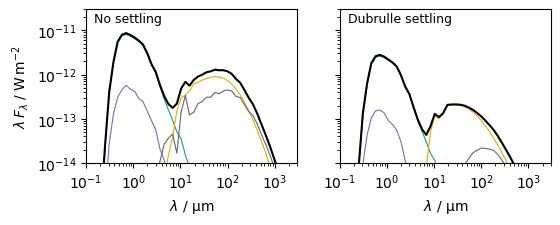

In [72]:
lambda_1 = sed_1[1].data
lambda_2 = sed_2[1].data

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6,2), sharey=True)
color = cm.Dark2(np.linspace(0,1,4))
for i in range(1,5):
    ax1.plot(lambda_1, sed_1[0].data[i,0,0], lw=0.8, c=color[i-1])
    ax2.plot(lambda_2, sed_2[0].data[i,0,0], lw=0.8, c=color[i-1])
ax1.plot(lambda_1, sed_1[0].data[0,0,0], c='black')
ax2.plot(lambda_2, sed_2[0].data[0,0,0], c='black')

plt.ylim(1e-14, 3e-11)
ax1.set_xlim(1e-1, 3e3)
ax2.set_xlim(1e-1, 3e3)
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_ylabel('$\lambda\,F_{\lambda}$ / $\mathrm{W\,m^{-2}}$')
ax1.set_xlabel('$\\lambda$ / $\\mathrm{\mu m}$')
ax2.set_xlabel('$\\lambda$ / $\\mathrm{\mu m}$')

ax1.text(1.5e-1, 1.5e-11, 'No settling', c='black', size=9)
ax2.text(1.5e-1, 1.5e-11, 'Dubrulle settling', c='black', size=9)

plt.savefig('graphics/sed_comparison.png', dpi=300, bbox_inches='tight')

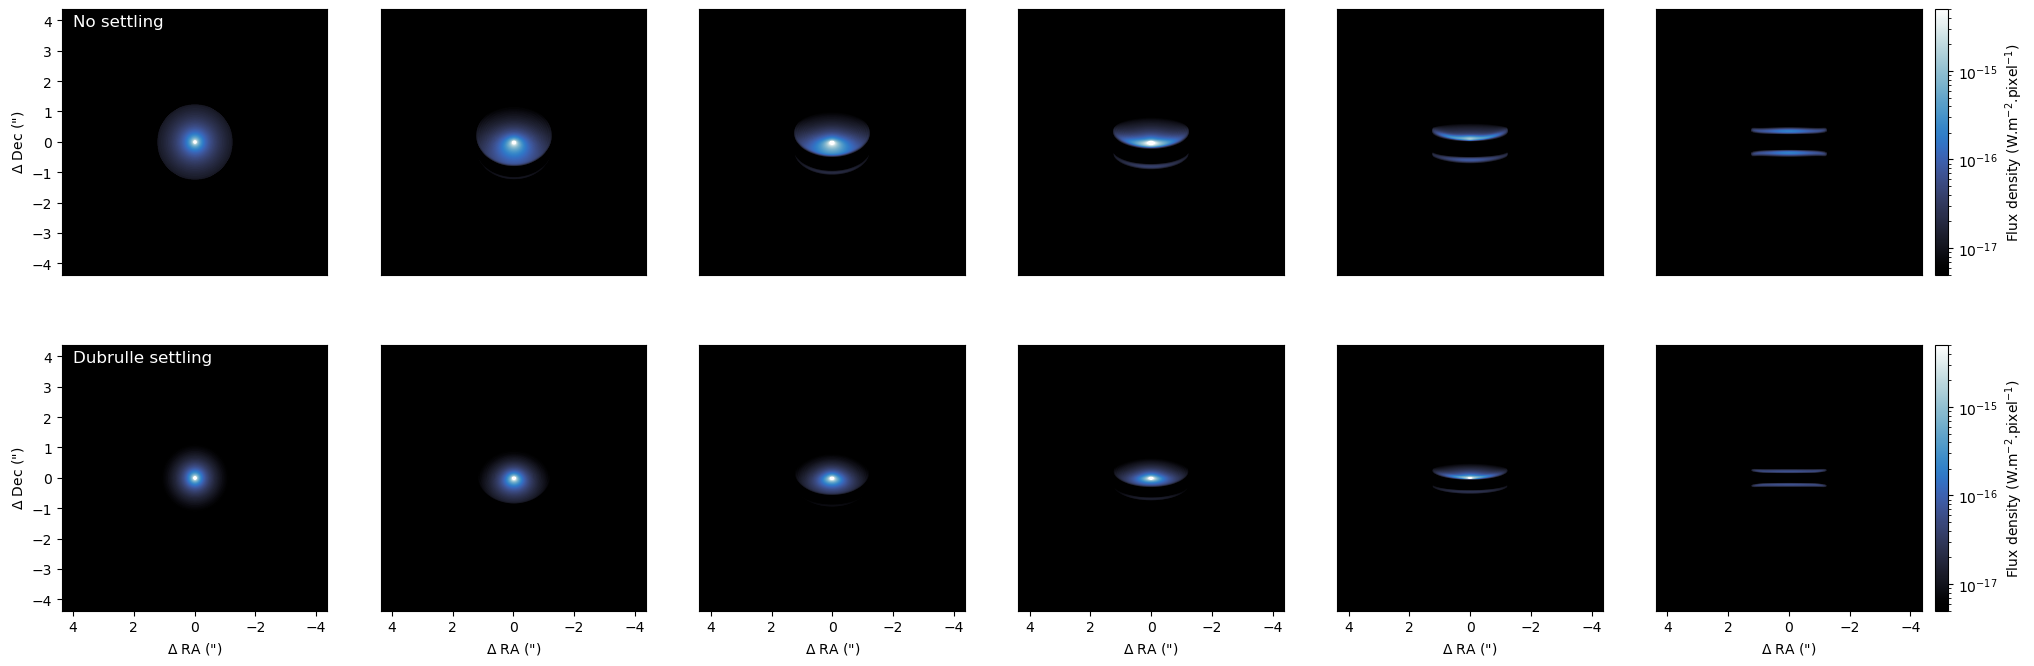

In [14]:
# image
fig, ((ax1, ax2, ax3, ax4, ax5, ax6), (ax7, ax8, ax9, ax10, ax11, ax12)) = plt.subplots(2,6, figsize=(24,8))
axes_1 = [ax2, ax3, ax4, ax5]
axes_2 = [ax8, ax9, ax10, ax11]

vmax = 5e-15
image_1um_1.plot(0, ax=ax1, vmax=vmax, colorbar=False, no_xlabel=True, no_xticks=True)
j=0
for i in axes_1:
    j+=1
    image_1um_1.plot(j, ax=i, vmax=vmax, colorbar=False, no_ylabel=True, no_yticks=True, no_xlabel=True, no_xticks=True)
image_1um_1.plot(5, ax=ax6, vmax=vmax, colorbar=True, no_ylabel=True, no_yticks=True, no_xlabel=True, no_xticks=True)
ax1.text(4, 3.8, 'No settling', c='white', size=12)

image_1um_2.plot(0, ax=ax7, vmax=vmax, colorbar=False)
j=0
for i in axes_2:
    j+=1
    image_1um_2.plot(j, ax=i, vmax=vmax, colorbar=False, no_ylabel=True, no_yticks=True)
image_1um_2.plot(5, ax=ax12, vmax=vmax, colorbar=True, no_ylabel=True, no_yticks=True)
ax7.text(4, 3.8, 'Dubrulle settling', c='white', size=12)
plt.savefig('graphics/dubrulle_settling_comparison.png', dpi=300, bbox_inches='tight')
plt.show()